# 부스팅

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
import pandas as pd
df = pd.DataFrame(wine.data, columns = wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
import numpy as np
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=2022
)

## XGBoost(eXtra Gradient Boost)
- PC에서 설치

        conda activate base
        conda install -c anaconda py-xgboost

In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2022)
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [10]:
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_xgb)

0.9722222222222222

- 시각화

In [36]:
from xgboost import plot_importance as xgb_plot_importance
import matplotlib.pyplot as plt

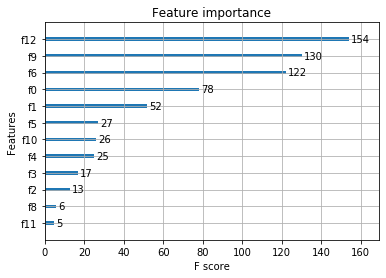

In [37]:
xgb_plot_importance(xgb)
plt.show()

- GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 4, 5, 6]}
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'max_depth': 4}

In [15]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.9722222222222222

## LightGBM
- PC에 설치

        conda activate base
        conda install -c conda-forge lightgbm

In [35]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [31]:
evals = [(X_test, y_test)]
lgb.fit(X_test, y_test, eval_set=evals, eval_metric='logloss', verbose=True)

C:\Users\min\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's multi_logloss: 1.09836
[2]	training's multi_logloss: 1.09836
[3]	training's multi_logloss: 1.09836
[4]	training's multi_logloss: 1.09836
[5]	training's multi_logloss: 1.09836
[6]	training's multi_logloss: 1.09836
[7]	training's multi_logloss: 1.09836
[8]	training's multi_logloss: 1.09836
[9]	training's multi_logloss: 1.09836
[10]	training's multi_logloss: 1.09836
[11]	training's multi_logloss: 1.09836
[12]	training's multi_logloss: 1.09836
[13]	training's multi_logloss: 1.09836
[14]	training's multi_logloss: 1.09836
[15]	training's multi_logloss: 1.09836
[16]	training's multi_logloss: 1.09836
[17]	training's multi_logloss: 1.09836
[18]	training's multi_logloss: 1.09836
[19]	training's multi_logloss: 1.09836
[20]	training's multi_logloss: 1.09836
[21]	training's multi_logloss: 1.09836
[22]	training's multi_logloss: 1.09836
[23]	training's multi_logloss: 1.09836
[24]	training's multi_logloss: 1.09836
[25]	training's multi_logloss: 1.09836
[26]	training's multi_logloss: 1.0

LGBMClassifier(random_state=2022)

In [32]:
pred_lgb = lgb.predict(X_test)
accuracy_score(y_test, pred_lgb)

0.3888888888888889

- 시각화

In [26]:
from lightgbm import plot_metric, plot_importance, plot_tree

C:\Users\min\Anaconda3\lib\site-packages\lightgbm\plotting.py:404: UserWarning: Attempting to set identical bottom == top == 1.0983562079117468 results in singular transformations; automatically expanding.
  ax.set_ylim(ylim)


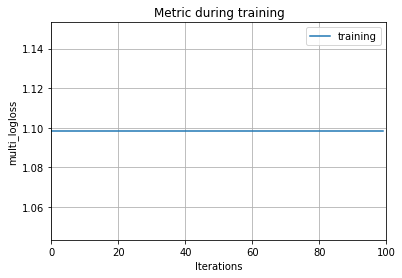

In [28]:
plot_metric(lgb);

In [33]:
plot_importance(lgb);

ValueError: not enough values to unpack (expected 2, got 0)

NotFittedError: No booster found. Need to call fit beforehand.

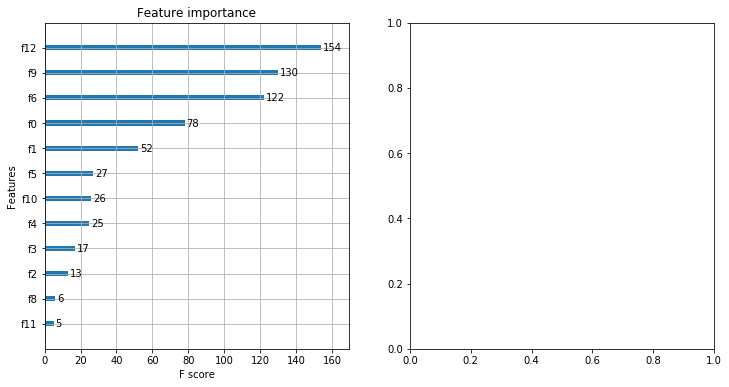

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
xgb_plot_importance(xgb, ax = ax[0])
plot_importance(lgb, ax=ax[1])
plt.show()

NotFittedError: No booster found. Need to call fit beforehand.

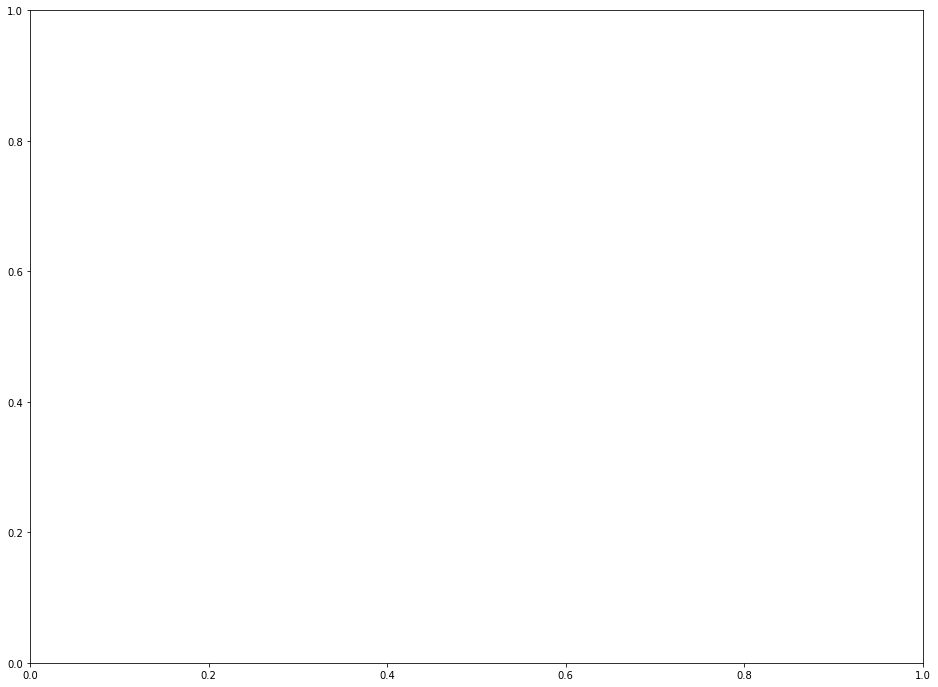

In [41]:
plot_tree(lgb, figsize=(16, 12));